24.0


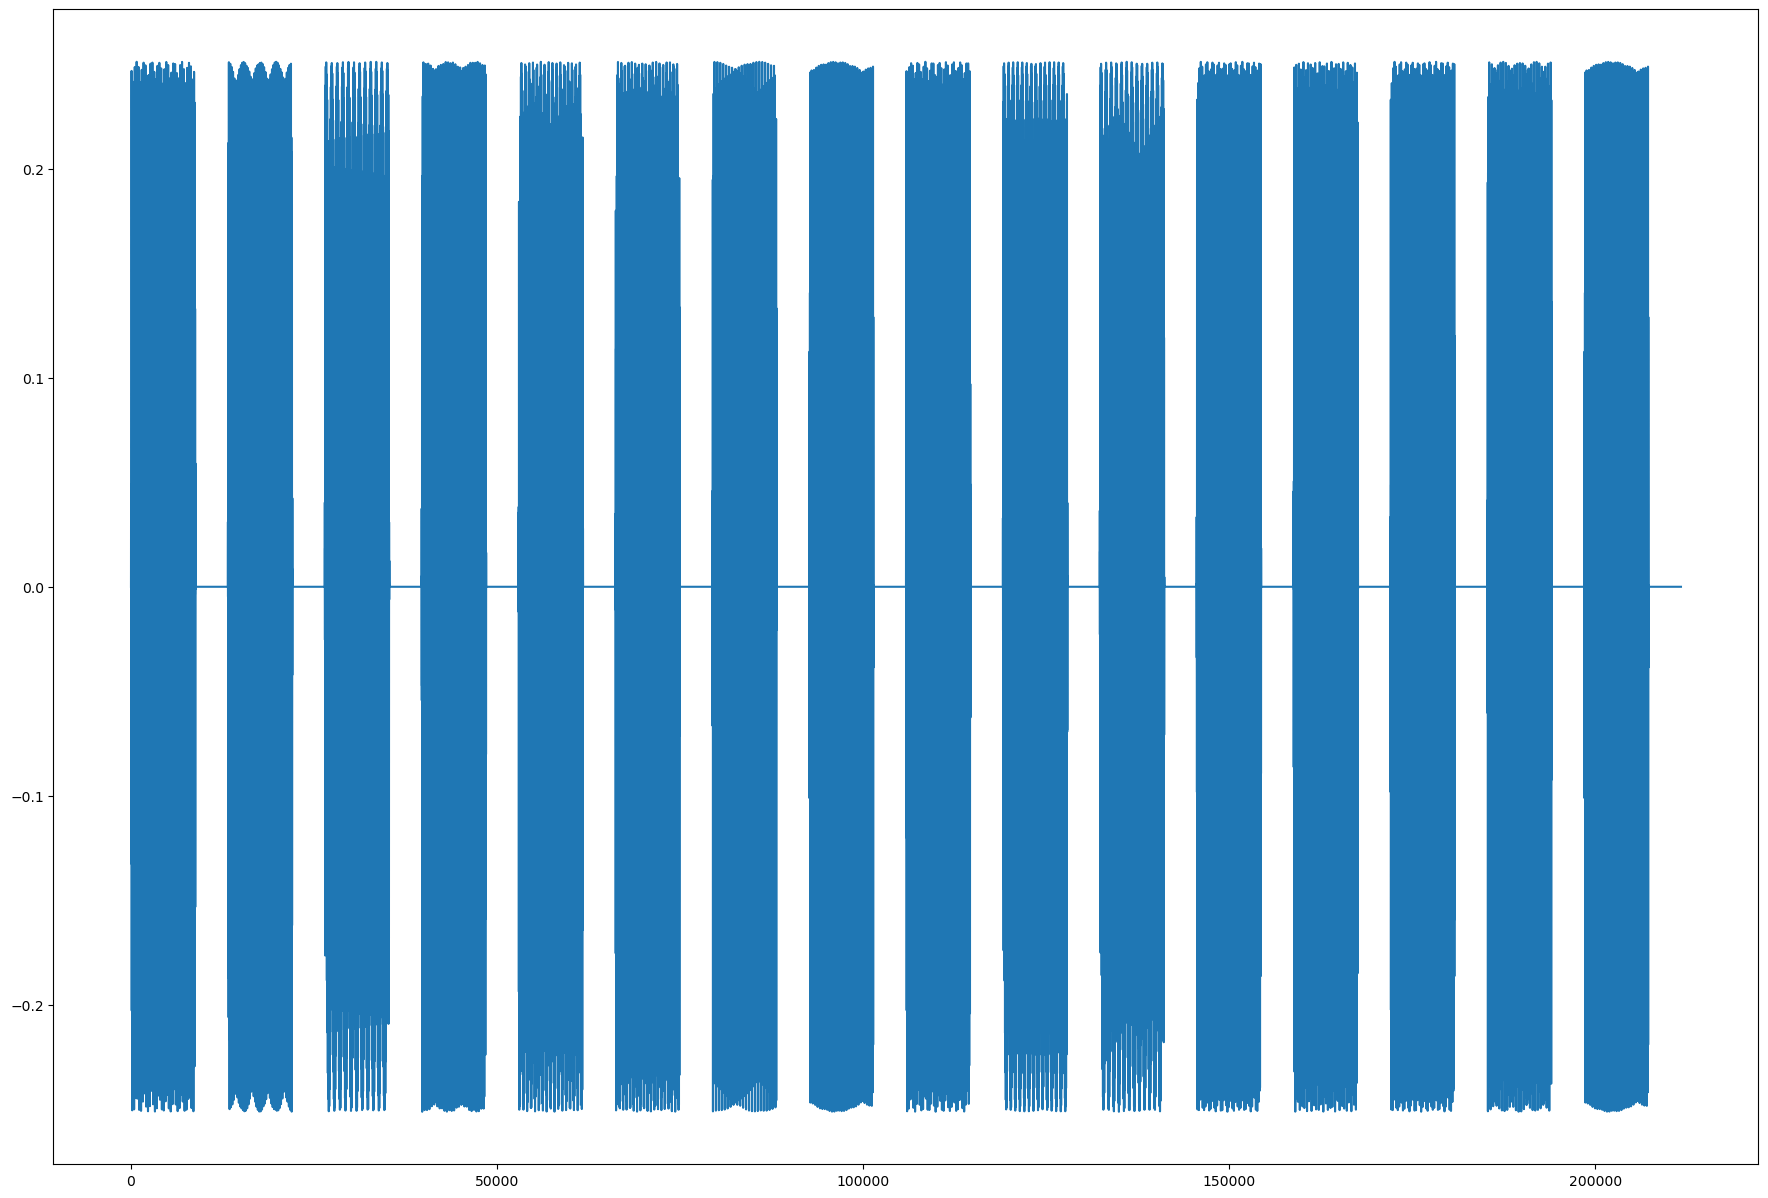

In [23]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math

filename = librosa.example('nutcracker', hq=True)
N1 = 44100
x, sr = librosa.load("DTMF_Lab8.wav", sr=N1)
dur = librosa.get_duration(y=x, sr=sr)

num_of_samples_in_frame = int(N1 * 0.2)
skip = int(num_of_samples_in_frame / 2)

splitted = np.split(x, len(x) / num_of_samples_in_frame)

print(len(x) / num_of_samples_in_frame)

fig, ax = plt.subplots(figsize=(22,15))
plt.plot(x)

blocks = []
 

for i in range(int(len(x) / int(num_of_samples_in_frame + skip))):
    blocks.append(x[i * (num_of_samples_in_frame + skip): i * (num_of_samples_in_frame + skip) + num_of_samples_in_frame])
    
    
freqs = [697, 770, 852, 941, 1209, 1336, 1477, 1633]
spectrals = [np.ceil(freqs[i] / N1 * num_of_samples_in_frame) for i in range(len(freqs))]

In [32]:
def goertzel(x, k, N):
    r = 2.0 * math.cos(2.0 * math.pi * k / N)
    g1, g2 = 0.0, 0.0
    for i in range(N):
        X = x[i] + r * g1 - g2
        g2, g1 = g1, X
    return g2**2 + g1**2 - r * g1 * g2

In [34]:
ress = []
for i in range(len(blocks)):
    res = []
    for j in range(len(freqs)):
        res.append(goertzel(blocks[i], spectrals[j], num_of_samples_in_frame))
    max1 = np.argmax(res)
    res[max1] = 0
    max2 = np.argmax(res)
    ress.append(np.sort([freqs[max1], freqs[max2]]))

symbols = {
    697*10000 + 1209 : "1",
    697*10000 + 1336 : "2",
    697*10000 + 1477 : "3",
    697*10000 + 1633 : "A",
    770*10000 + 1209 : "4",
    770*10000 + 1336 : "5",
    770*10000 + 1477 : "6",
    770*10000 + 1633 : "B",
    852*10000 + 1209 : "7",
    852*10000 + 1336 : "8",
    852*10000 + 1477 : "9",
    852*10000 + 1633 : "C",
    941*10000 + 1209 : "*",
    941*10000 + 1336 : "0",
    941*10000 + 1477 : "#",
    941*10000 + 1633 : "D",
}

for item in ress:
    print(symbols[item[0] * 10000 + item[1]], end=" ")

Ответ:
1 A 2 # 3 B 4 * 5 C 6 D 7 D 8 * 